# 1. Importing necessary libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 5000)
pd.set_option('precision', 5)

# 2. read csv files 

In [98]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# train_data= [train_data , test_data]
# train_data= pd.concat(train_data , ignore_index=True)

In [99]:
train_data.shape

(6019, 14)

In [100]:
test_data.shape

(1234, 13)

In [101]:
train_data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


# 3. EDA phase 

### 3.1  show the features and type it : 

In [102]:
# show number rows and coloumns

train_data.shape

(6019, 14)

In [103]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### 3.2 show the data by head function

In [104]:

train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 3.3  In Data Analysis We will try to Find out:
1. Missing Values in the dataset.
2. All the Numerical variables and Distribution of the numerical variables.
3. Categorical Variables
4. Outliers
5. Relationship between an independent and dependent feature(selling_price)

In [105]:
# check for missing data  :
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [106]:
# Handling of Missing values: 
# 1- i will drop  New_price and Unnamed coloumns 
train_data= train_data.drop(['New_Price'],axis=1)
train_data= train_data.drop(['Unnamed: 0'],axis=1)

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [108]:
# check mode of Seats columns
seat_mode=train_data['Seats'].mode
seat_mode

<bound method Series.mode of 0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6019, dtype: float64>

In [109]:
# fill null value i seat by mode
train_data['Seats'].fillna(value=5,inplace=True)

In [110]:
# check mode of  columns
Mileage_mode=train_data['Mileage'].mode
Mileage_mode

<bound method Series.mode of 0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object>

In [111]:
# check for missing data in seats :
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

In [123]:
mask=train_data['Power']!='null '

In [124]:
mask

0       True
1       True
2       True
3       True
4       True
        ... 
6014    True
6015    True
6016    True
6017    True
6018    True
Name: Power, Length: 5981, dtype: bool

In [125]:
train_data=train_data[mask]

In [126]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [127]:
mask=train_data['Power']!='null'

In [128]:
train_data=train_data[mask]

In [129]:
# # drop row that have null value Mileage ,Engine , Power :

train_data= train_data.dropna(axis=0)

In [130]:
# check for missing data in seats :
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   object 
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 596.6+ KB


In [132]:
#Removing units from Mileage , Engine , Power :

train_data['Mileage'] = train_data['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
train_data['Mileage'] = train_data['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))
#removing CC from engine column
train_data['Engine'] = train_data['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))
#removing bhp from power column
train_data['Power'] = train_data['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))



In [133]:
#Converting the three columns to numeric type:

train_data['Mileage'] = train_data['Mileage'].astype(float, errors = 'raise')
train_data['Engine'] = train_data['Engine'].astype(float, errors = 'raise')
train_data['Power'] = train_data['Power'].astype(float, errors = 'raise')


In [134]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [135]:
#show information of dataframe after delete null rows and new_price
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.6+ KB


## Feature engineering:

In [136]:
"""  create  brand names from name column  """

train_data['Brand_Name'] = train_data['Name'].str.split(' ').str[0]


In [137]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
 12  Brand_Name         5874 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 642.5+ KB


In [138]:
#show dataframe after create new column that contain brand name
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [139]:
# Unique values of new column Brand_Name

train_data['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [140]:
# the same brand written twice one in standered and second capital letter
# i will change rows that have capital to the stander 

train_data['Brand_Name'].replace('ISUZU','Isuzu',inplace=True)

In [141]:
#check Unique values of new column Brand_Name after replace

train_data['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [142]:
# create new dataframe after delete name , location columns :

train_data_new = train_data.drop(["Name","Location"],axis=1)

In [143]:
train_data_new.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [144]:
train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5874 non-null   int64  
 1   Kilometers_Driven  5874 non-null   int64  
 2   Fuel_Type          5874 non-null   object 
 3   Transmission       5874 non-null   object 
 4   Owner_Type         5874 non-null   object 
 5   Mileage            5874 non-null   float64
 6   Engine             5874 non-null   float64
 7   Power              5874 non-null   float64
 8   Seats              5874 non-null   float64
 9   Price              5874 non-null   float64
 10  Brand_Name         5874 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 550.7+ KB


<Figure size 1080x1080 with 0 Axes>

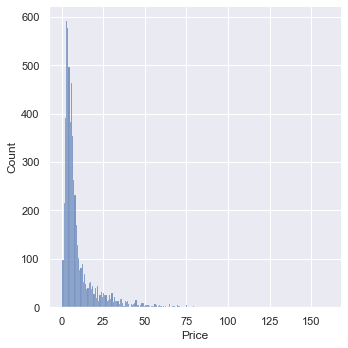

In [145]:
plt.figure(figsize=(15,15))
sns.displot(train_data_new['Price'])

----

### 1.  Brand_Name vs Car count

<Figure size 1440x720 with 0 Axes>

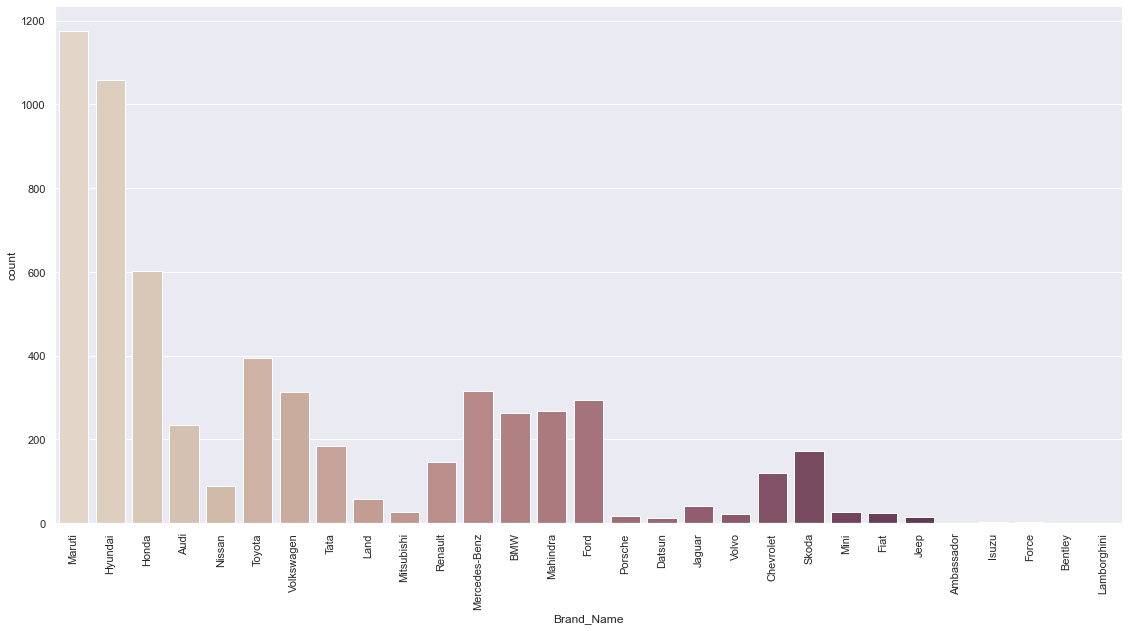

In [146]:
var = "Brand_Name"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

### The Result : Maruti and Hyundai are buy more other brand.

----

### 2. Year vs Car Count

<Figure size 1440x720 with 0 Axes>

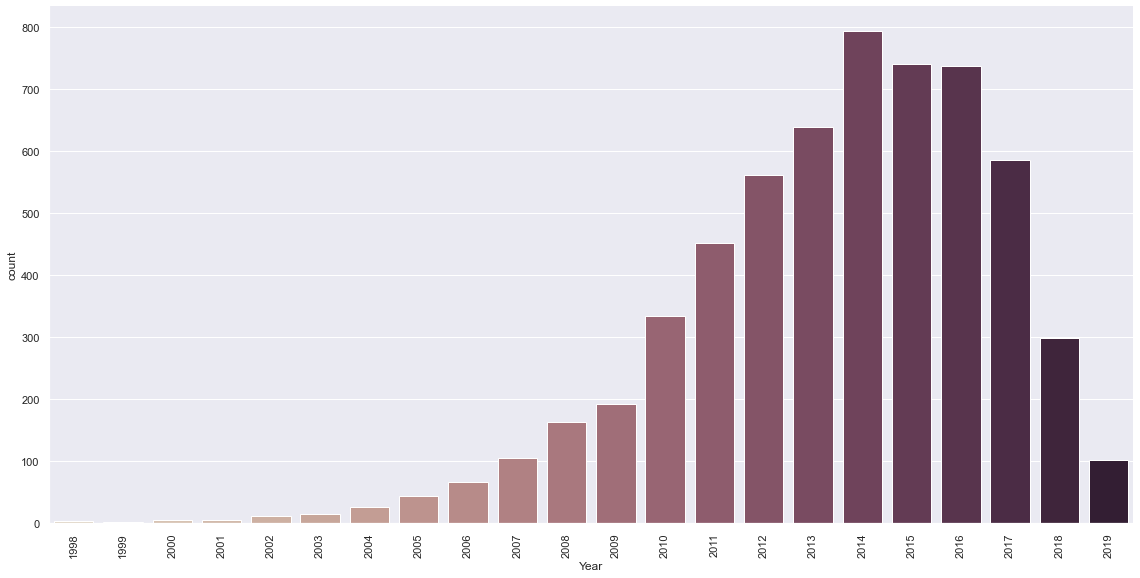

In [147]:
var = "Year"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

### The Result : The 2014 the best but from 2011-2017 are maximum .


--------
---

# Analysis features with respect to Price

### 1. year vs price

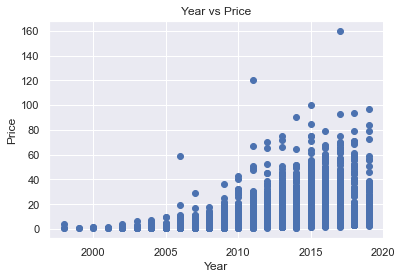

In [148]:

plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(train_data_new.Year,train_data_new.Price)


###  Cars ranging between the years 2012 to 2020 cost more

---

### 2. fuel type vs price

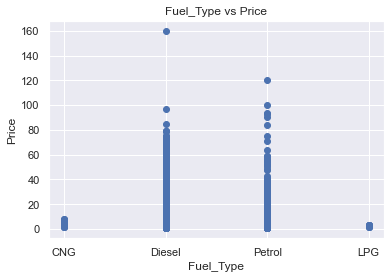

In [149]:

plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(train_data_new.Fuel_Type,train_data_new.Price)


### Petrol and diesel cars are costly

---

### 3. transmission vs price

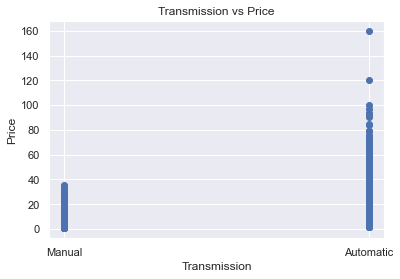

In [150]:

plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(train_data_new.Transmission,train_data_new.Price)

### Automatic cars cost more than manual cars

---

### 4. owner type vs price


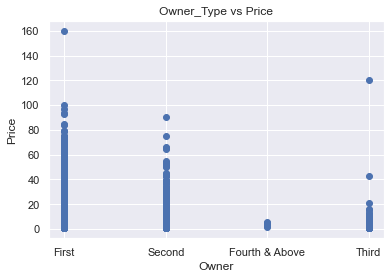

In [151]:
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(train_data_new.Owner_Type,train_data_new.Price)

### First-hand and second-hand  cars are costly.

### 5. Kilometers Driven vs price

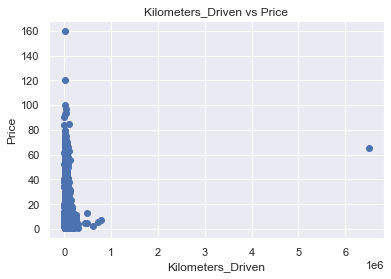

In [152]:


plt.title("Kilometers_Driven vs Price")
plt.xlabel("Kilometers_Driven")
plt.ylabel("Price")
plt.scatter(train_data_new.Kilometers_Driven,train_data_new.Price)



### one of the cars has km drove more than 6500000, this is an outlier and we need to remove it

 ---
 ---
 ---

## 3.4 Handling categorical Columns

In [153]:
from sklearn import model_selection, preprocessing
c = 'Fuel_Type'
if train_data_new[c].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_data_new[c].values)) 
    train_data_new[c] = lbl.transform(list(train_data_new[c].values))

In [155]:
c = 'Fuel_Type'
if train_data_new[c].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_data_new[c].values)) 
    train_data_new[c] = lbl.transform(list(train_data_new[c].values))

In [156]:
c = 'Transmission'
if train_data_new[c].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_data_new[c].values)) 
    train_data_new[c] = lbl.transform(list(train_data_new[c].values))


In [157]:
c = 'Owner_Type'
if train_data_new[c].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_data_new[c].values)) 
    train_data_new[c] = lbl.transform(list(train_data_new[c].values))

In [158]:
c = 'Brand_Name'
if train_data_new[c].dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_data_new[c].values)) 
    train_data_new[c] = lbl.transform(list(train_data_new[c].values))

In [159]:
train_data_new.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,17
1,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,10
2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50,9
3,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,17
4,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,1


In [160]:
train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5874 non-null   int64  
 1   Kilometers_Driven  5874 non-null   int64  
 2   Fuel_Type          5874 non-null   int64  
 3   Transmission       5874 non-null   int64  
 4   Owner_Type         5874 non-null   int64  
 5   Mileage            5874 non-null   float64
 6   Engine             5874 non-null   float64
 7   Power              5874 non-null   float64
 8   Seats              5874 non-null   float64
 9   Price              5874 non-null   float64
 10  Brand_Name         5874 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 679.7 KB



---

### 3.5 Removing outlier

In [161]:

train_data_new.drop(train_data_new[train_data_new['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

---

## 3.6 Correlation matrix

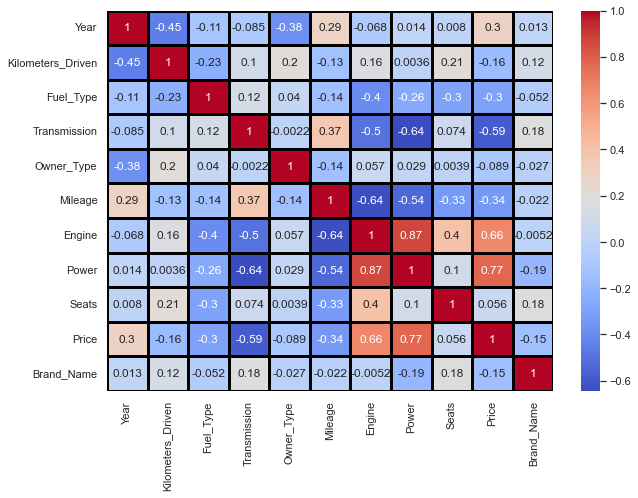

In [162]:
Cm  = train_data_new.corr()
plt.figure(figsize=(10,7))
sns.heatmap(Cm, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

# 4.  Model 
1. Linear Regression
2. Random Forest


In [163]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [85]:
X=train_data_new.drop('Price',axis=1)
y=train_data_new['Price']

/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


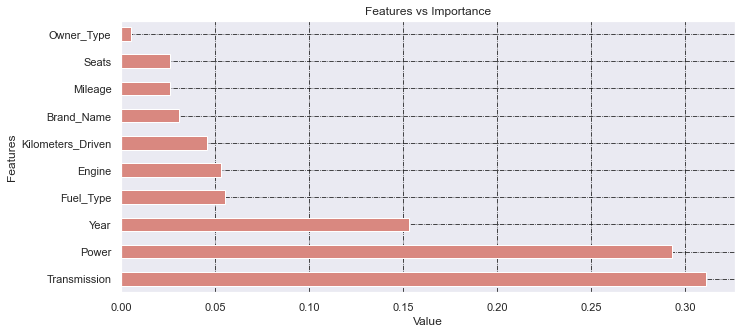

In [165]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
plt.grid()
feat_importances.nlargest(10).plot(kind='barh',color='#D98880')##45B39D
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

In [166]:
X.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Name
0,2010,72000,0,1,0,26.60,998.0,58.16,5.0,17
1,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,10
2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,9
3,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,17
4,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,1


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [50,60]
           }}}
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(X,y)
result


/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

,model,best_score,best_params
0,linear_regression,0.68954,{'normalize': True}
1,lasso,0.67422,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.79466,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,Random_forest,0.88982,"{'max_features': 'sqrt', 'n_estimators': 60}"


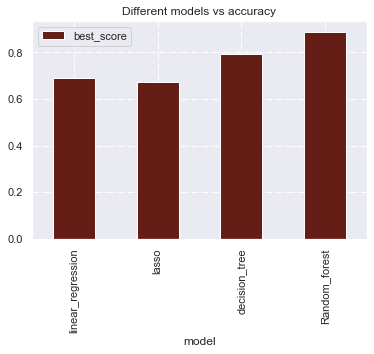

In [168]:
result_map=result.drop(['best_params'],axis='columns')
result_map.plot(x="model",y='best_score',kind='bar',color='#641E16',title='Different models vs accuracy')
plt.grid(linestyle='-.')

### 6.1 Splitting the data frame for training 

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
X_train.shape 

(4698, 10)

In [171]:
X_test.shape

(1175, 10)

In [172]:
RF_Model  = RandomForestRegressor(max_features='sqrt' , bootstrap='True') 

In [173]:
RF_Model.fit(X_train,y_train)

/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [182]:
RF_Model.score(X_test,y_test)

/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.8805772079325134

In [175]:
y_predict = RF_Model.predict(X_test)

/Users/surayhanalsalmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [179]:

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [181]:

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_predict))

Mean Absolute Error      :  1.5789586828774065
Mean Squared  Error      :  11.753151613411251
Root Mean Squared  Error :  3.4282869794419564
R Squared Error          :  0.8805772079325134


In [176]:
df_predict=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
df_predict.head(10)

,Actual,Predicted
5500,8.00,6.860
4436,3.50,3.222
205,19.90,24.550
3345,2.40,3.419
3585,5.25,7.939
2621,1.55,1.567
2841,14.50,20.115
5201,7.65,6.488
1244,11.25,11.173
4838,4.29,4.101
